In [1]:
!nvidia-smi

Mon Sep 12 13:10:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.152.00   Driver Version: 418.152.00   CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-DGXS...  On   | 00000000:07:00.0 Off |                    0 |
| N/A   48C    P0    62W / 300W |     57MiB / 32478MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-DGXS...  On   | 00000000:08:00.0 Off |                    0 |
| N/A   48C    P0    55W / 300W |   1905MiB / 32478MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [2]:
args = {
    'comment': 'sc0.5 p768 + prostate shakal + OT + simmimv2 pretrain + harden augm',
    'current_fold': 4,
    'device': 'cuda:0',
    'debug': False,
    'short_name': 'coat-small',
    'output_folder': './coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/',
    'dataset': {
        'function': 'make_768_dataset',
        'n_cross_valid_splits': 5,
        'random_seed': 2022,
        'train_csv': './../data/train.csv',
        'train_images_dir': './../data/train_images_patches_768_overlap/',
        'train_masks_dir': './../data/train_masks_patches_768_overlap/',
        'spatial_size': 768,
        'dataset_class': 'hubmap_p768_organid',
        'augmentations': {
            'train': 'train_transform_b',
            'val': 'val_transform_a',
        }
    },
    'start_global_it': 15000,
    'start_epoch': 11,
    'model': {
        'encoder': 'coat_parallel_small_organ_token',
        'decoder': 'daformer_3x3_conv',
        'n_classes': 6,  # may not working if changed to 1
        'checkpoint_preload': {
            'function': 'load_encoder_pretrained',
            'args': {
                'path_to_checkpoint': './coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/checkpoint_fold_4/coat-small_ep_010_dice_0.740380_LAST.pt',
                'strict': False,
            }
            
        }
    },
    'batch_size': 4,
    'virtual_batch_size': 1,
    'base_lr': 4e-5,
    'optimizer': 'adamw',
    'optimizer_args': {
        'weight_decay': 5e-3,
    },
    'n_epochs': 80,
    'criterion_schedule': 'criterion_schedule_1',
    'lr_schedule_function': 'lr_function_a1',
    'aux_losses': [
        ('aux_serial_1', 0.2),
        ('aux_serial_2', 0.2),
        ('aux_serial_3', 0.2),
        ('aux_parallel_1', 0.2),
        ('aux_parallel_2', 0.4),
        ('aux_parallel_3', 0.1),
    ],
    'validation_function': 'validate_a1',
    'keep_last_n_checkpoints': {
        'function': 'keep_top_n_checkpoints_coat_by_ep',
        'n': 10,
    },
    'before_train': [
#         'freeze_encoder_a',
    ],
    'unfreeze_encoder': {
        'active': False,
        'n_epoch': 4
    },
}

In [3]:
from training.training_base import train_a1

/opt/conda/lib/python3.6/site-packages/albumentations/augmentations/dropout/cutout.py:52: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  FutureWarning,


In [ ]:
train_a1(args)

# coat unet

In [1]:
from configs.config import *
from training.training_base import train_a1

args = read_args_from_config('./configs/coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080.json', 
                             fold=4, device='cuda:0')
args['model']['checkpoint_preload']['args']['path_to_checkpoint'] = \
    './../coat-sc05-p768-organ-token/checkpoint_fold_4/coat-small-organ-token-fold4_TOP_5_BEST.pt'

/opt/conda/lib/python3.6/site-packages/albumentations/augmentations/dropout/cutout.py:52: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  FutureWarning,


In [2]:
args

{'comment': 'sc0.5 p768 + OT + simmimv1 pretrain + unet decoder',
 'current_fold': 4,
 'device': 'cuda:0',
 'debug': False,
 'short_name': 'coat-small-unet',
 'output_folder': './coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080/',
 'dataset': {'function': 'make_768_dataset',
  'n_cross_valid_splits': 5,
  'random_seed': 2022,
  'train_csv': './../data/train.csv',
  'train_images_dir': './../data/train_images_patches_768_overlap/',
  'train_masks_dir': './../data/train_masks_patches_768_overlap/',
  'spatial_size': 768,
  'dataset_class': 'hubmap_p768_organid',
  'augmentations': {'train': 'train_transform_a', 'val': 'val_transform_a'}},
 'start_global_it': 0,
 'start_epoch': 0,
 'model': {'encoder': 'coat_parallel_small_organ_token',
  'decoder': 'unet_decoder',
  'n_classes': 6,
  'checkpoint_preload': {'function': 'load_encoder_from_swa_checkpoint',
   'args': {'path_to_checkpoint': './../coat-sc05-p768-organ-token/checkpoint_fold_4/coat-small-organ-token-fold4_TOP_5_BEST.pt'

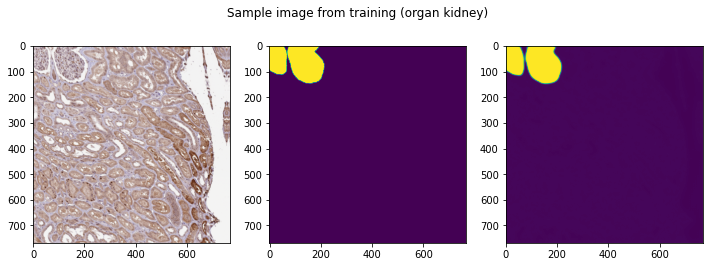

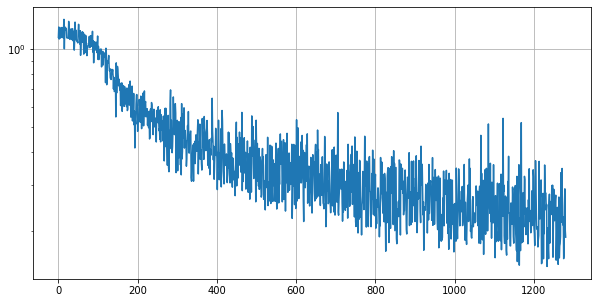

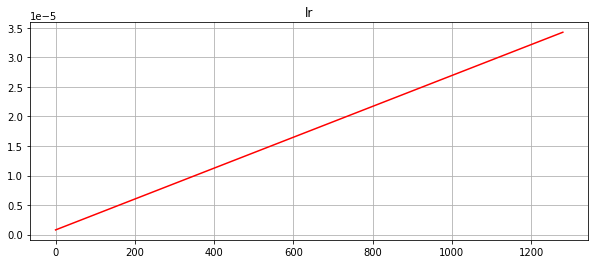

==> Epoch 0 (1284/1732) | loss: 0.16828
==> Epoch 0 (1289/1732) | loss: 0.22781
==> Epoch 0 (1294/1732) | loss: 0.17596
==> Epoch 0 (1299/1732) | loss: 0.22994
==> Epoch 0 (1304/1732) | loss: 0.22853


In [ ]:
train_a1(args)